# Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from IPython.display import display
warnings.filterwarnings(action='ignore')

# Importing the dataset

In [2]:
dataset='data.csv'
data = pd.read_csv(dataset)
data.drop("Unnamed: 0",axis=1,inplace=True)
print(data.head())


       Date  Hours   WS   WD PM10
0  1/4/2015  01:00  1.4  141   39
1  1/4/2015  02:00  1.2  168   40
2  1/4/2015  03:00  1.1  160   32
3  1/4/2015  04:00  0.5  233   20
4  1/4/2015  05:00  0.8   55   11



# Data Preprocessing 

##### Print the data information and replace the "NoData", "Samp", "OffScan" values ​​with the recognized NaN value for the dataframe

In [3]:
data.info()
print('Are there any duplicated values in our data ? : {}\n'.format(data.duplicated().any()))
print('The total number of null values in each column:')
new_data=data.replace('NoData', np.NaN)                                         #antikathistw tis NoData values me anagnwrisimo NaN gia to dataframe
new_data=new_data.replace('Samp<', np.NaN)
new_data=new_data.replace('OffScan', np.NaN)
print(new_data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    7752 non-null   object
 1   Hours   7752 non-null   object
 2   WS      7752 non-null   object
 3   WD      7752 non-null   object
 4   PM10    7752 non-null   object
dtypes: object(5)
memory usage: 302.9+ KB
Are there any duplicated values in our data ? : False

The total number of null values in each column:
Date     0
Hours    0
WS       6
WD       6
PM10     6
dtype: int64


####Conversion of degrees to wind directions

In [4]:
df=new_data #copy to df
df=df.astype({'WD': 'float64'})
df=df.astype({'WS': 'float64'})
df=df.astype({'PM10': 'float64'})

df.loc[(df['WD'] >337.5) | (df['WD']<=22.5),'WD1']= 'N'

df.loc[(df['WD'] >22.5) & (df['WD']<=67.5),'WD2']= 'NE'

df.loc[(df['WD'] >67.5) & (df['WD']<=112.5),'WD3']= 'Ε'

df.loc[(df['WD'] >112.5) & (df['WD']<=157.5),'WD4']= 'SE'

df.loc[(df['WD'] >157.5) & (df['WD']<=202.5),'WD5']= 'S'

df.loc[(df['WD'] >202.5) & (df['WD']<=247.5),'WD6']= 'SW'

df.loc[(df['WD'] >247.5) & (df['WD']<=292.5),'WD7']= 'W'

df.loc[(df['WD'] >292.5) & (df['WD']<=337.5),'WD8']= 'NW'

#kanw x.dropna gia na xefortwthw tis NaN times
df["WindDirection"]=df[['WD1','WD2','WD3','WD4','WD5','WD6','WD7','WD8']].apply(lambda x: ''.join(x.dropna().astype(str)),axis=1)

####Change the wrong time and combine the hours with the dates

In [5]:
df=df.replace('24:00', '00:00')                    #diorthwnw tin lanthasmeni wra
df['months']=df['Date'].str.split('/').str[1]
df['days']=df['Date'].str.split('/').str[0]
df['hours']=df['Hours'].str.split(':').str[0]
df['nodays']=df['Date'].str.split('').str[0]

#ftiaxnw to datetime enwnw thn hmeromhnia me tis wres 
full_date=[]
for i in range(df.shape[0]):
       full_date.append(str(df['months'].values[i]+'-'+str(df['days'].values[i])+'-15'+' '+str(df['Hours'].values[i])))#default seira M D Y vazw 15 gt to kanei aytomata 2015          
dates=pd.to_datetime(full_date)
dates=pd.DataFrame(dates,columns=['datetime'])
df=pd.concat([dates,df],axis=1)
print(dates)


                datetime
0    2015-04-01 01:00:00
1    2015-04-01 02:00:00
2    2015-04-01 03:00:00
3    2015-04-01 04:00:00
4    2015-04-01 05:00:00
...                  ...
7747 2015-09-02 20:00:00
7748 2015-09-02 21:00:00
7749 2015-09-02 22:00:00
7750 2015-09-02 23:00:00
7751 2015-09-02 00:00:00

[7752 rows x 1 columns]


####I convert the values ​​of PΜ10 into air quality indicators (categorical type)


In [6]:
#Metatrepw tis times toy PM10 se deiktes poiotitas tou aera (1-10)
df.loc[(df['PM10'] >= 0) & (df['PM10']<=16),'LOW1']= 1

df.loc[(df['PM10'] >= 17) & (df['PM10']<=33),'LOW2']= 2

df.loc[(df['PM10'] >= 34) & (df['PM10']<=50),'LOW3']= 3

df.loc[(df['PM10'] >= 51) & (df['PM10']<=58),'MOD1']= 4

df.loc[(df['PM10'] >= 59) & (df['PM10']<=66),'MOD2']= 5

df.loc[(df['PM10'] >= 67) & (df['PM10']<=75),'MOD3']= 6

df.loc[(df['PM10'] >= 76) & (df['PM10']<=83),'HIGH1']= 7

df.loc[(df['PM10'] >= 84) & (df['PM10']<=91),'HIGH2']= 8

df.loc[(df['PM10'] >= 92) & (df['PM10']<=100),'HIGH3']= 9

df.loc[(df['PM10'] > 100) ,'VERYHIGH']= 10

df["PM10_deiktis"]=df[['LOW1','LOW2','LOW3','MOD1','MOD2','MOD3','HIGH1','HIGH2','HIGH3','VERYHIGH']].apply(lambda x: ''.join(x.dropna().astype(int).astype(str)),axis=1)
#kanw thn nea sthlh int (Cannot use mean strategy with non-numeric data)
#df['PM10_deiktis']=df['PM10_deiktis'].replace({'1':1, '2':2, '3':3, '4':4, '5':5, '6':6, '7':7, '8':8, '9':9,'10':10}) 
df["PM10_deiktis"] = pd.to_numeric(df["PM10_deiktis"])
newDf=df[['hours','days','months','WindDirection','WS','PM10','PM10_deiktis']]

Find the most appearing wind direction value and the max values 

In [7]:
print('\nMost appearing for Wind speed',df.WS.mode())
print('Most appearing for direction ',df.WindDirection.mode())
print('Most appearing for PM10 ', df.PM10.mode())
print('\nMax values','\n WindSpeed:',df.WS.max(), '\n WindDirection:', df.WindDirection.max() )


Most appearing for Wind speed 0    0.7
dtype: float64
Most appearing for direction  0    NW
dtype: object
Most appearing for PM10  0    14.0
dtype: float64

Max values 
 WindSpeed: 8.3 
 WindDirection: Ε


####Plot the data

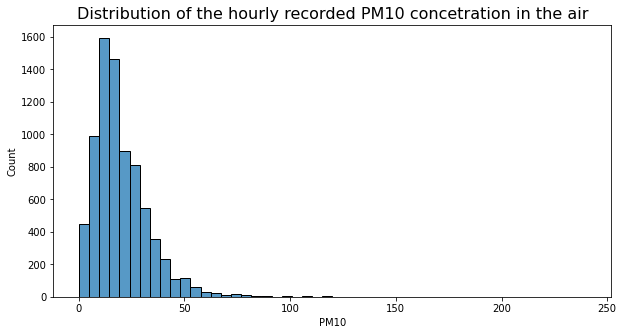

In [8]:
plt.figure(figsize=(10,5))
sns.histplot(df['PM10'],bins=50)
plt.title('Distribution of the hourly recorded PM10 concetration in the air',fontsize=16)
plt.show()


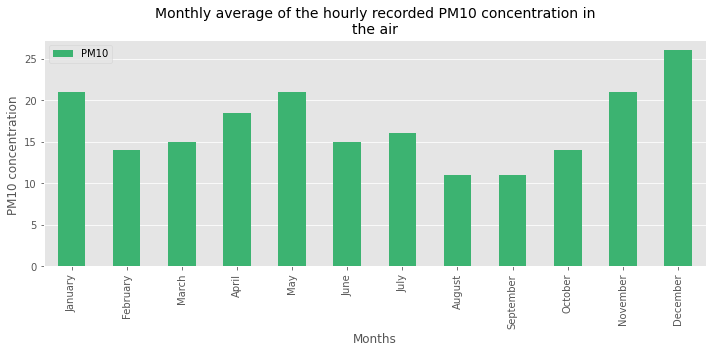

In [9]:
df['months']=df['months'].replace('08',8)
df['months']=df['months'].replace('07',7)
df['months']=df['months'].replace('06',6)
df=df.astype({'months': 'int64'})

monthly_data=df[['months','PM10']]
months2 = ['January','February','March','April','May','June','July',
           'August','September','October','November','December']
monthdf = pd.DataFrame(months2,columns=['months'])
monthFullname={}
for i,j in enumerate(months2):
    monthFullname.setdefault(i+1,j)                                             #i+1 giati thelw na xekinaei apo 1(Ianouarios) kai oxi apo 0

#antistoixisi sto dataframe twn mhnwn -> olografws tous mhnes
monthly_data.months = monthly_data.months.map(monthFullname)
monthly_avg=monthly_data.groupby('months').median()                             #Ton meso oro PM10 ana mina
monthly_avg = pd.merge(monthdf,monthly_avg,left_on='months',right_index=True)
#strogilopoihsh ton meso oro se periptwsh pou xreiastei
monthly_avg = np.round(monthly_avg,1)
monthly_avg=monthly_avg.set_index('months')

with plt.style.context('ggplot'):
    monthly_avg.plot(figsize=(10,5),kind='bar',color='mediumseagreen',linewidth=1)
    plt.xlabel('Months',fontsize=12)
    plt.ylabel('PM10 concentration ',fontsize=12)
    plt.title('Monthly average of the hourly recorded PM10 concentration in\nthe air',fontsize=14)
    plt.grid(axis='x')
    plt.tight_layout()
    plt.show()


In [10]:
#diorthwnw to format ths wras apo 01 02 se 1,2 klp.
df['hours']=df['hours'].replace({'00':0, '01':1}) 

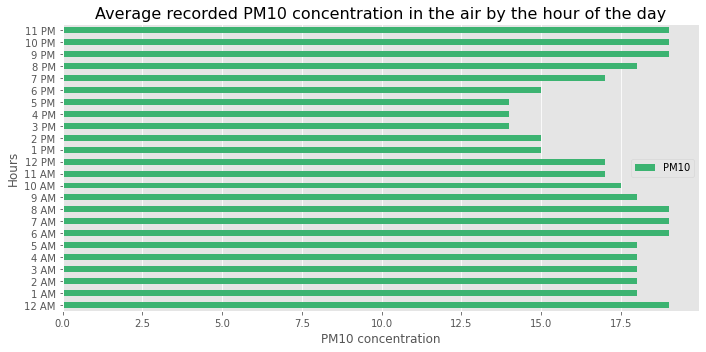

In [11]:
hours=['12 AM','1 AM','2 AM','3 AM','4 AM','5 AM','6 AM','7 AM','8 AM','9 AM','10 AM',
      '11 AM','12 PM','1 PM','2 PM','3 PM','4 PM','5 PM','6 PM','7 PM','8 PM','9 PM','10 PM','11 PM']
hours_matching={}
for i,j in enumerate(hours):
    hours_matching.setdefault(i,j)

hourly_avg=df[['hours','PM10']].groupby('hours').median().reset_index()
hourly_avg.hours=hourly_avg.hours.map(hours_matching)
hourly_avg=hourly_avg.set_index('hours')

with plt.style.context('ggplot'):
    hourly_avg.plot(figsize=(10,5),color='mediumseagreen',kind='barh',linewidth=1)
    plt.ylabel('Hours',fontsize=12)
    plt.xlabel('PM10 concentration',fontsize=12)
    plt.title('Average recorded PM10 concentration in the air by the hour of the day',fontsize=16)
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

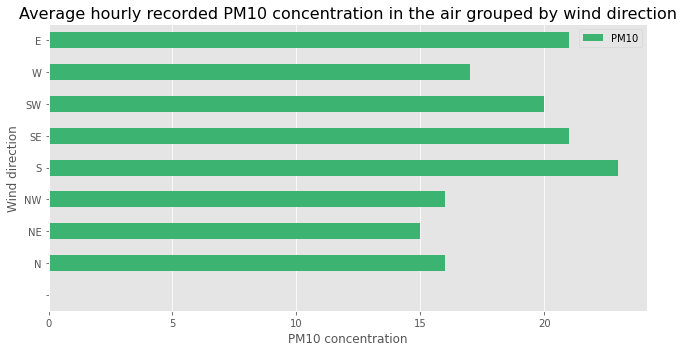

In [12]:
wind_data=df[['WindDirection','PM10']]
wind_data=wind_data.groupby('WindDirection').median()

with plt.style.context('ggplot'):
    wind_data.plot(figsize=(10,5),color='mediumseagreen',kind='barh',linewidth=1)
    plt.ylabel('Wind direction',fontsize=12)
    plt.xlabel('PM10 concentration',fontsize=12)
    plt.title('Average hourly recorded PM10 concentration in the air grouped by wind direction',fontsize=16)
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

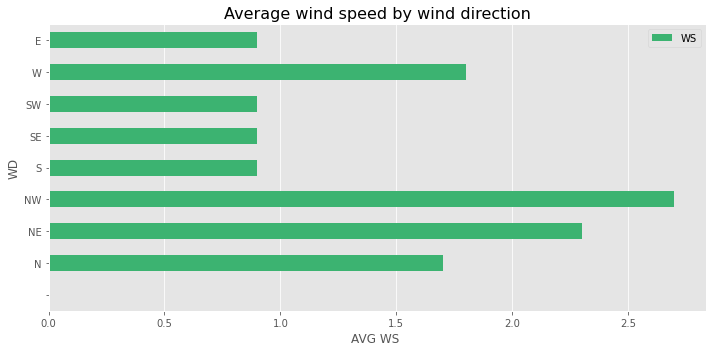

In [13]:
wind_speed=df[['WS','WindDirection']]
wind_speed=wind_speed.groupby('WindDirection').median()

with plt.style.context('ggplot'):
    wind_speed.plot(figsize=(10,5),color='mediumseagreen',kind='barh',linewidth=1)
    plt.ylabel('WD',fontsize=12)
    plt.xlabel('AVG WS ',fontsize=12)
    plt.title('Average wind speed by wind direction',fontsize=16)
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

##Taking care of missing data

In [14]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(newDf.iloc[:,4:].values)
newDf.iloc[:,4:] = imputer.transform(newDf.iloc[:,4:].values)

#reset to characters
newDf.loc[(newDf['PM10_deiktis'] == 1),'LOW1']='low1'
newDf.loc[(newDf['PM10_deiktis'] == 2),'LOW2']='low2'
newDf.loc[(newDf['PM10_deiktis'] == 3),'LOW3']='low3'
newDf.loc[(newDf['PM10_deiktis'] == 4),'MOD1']='mod1'
newDf.loc[(newDf['PM10_deiktis'] == 5),'MOD2']='mod2'
newDf.loc[(newDf['PM10_deiktis'] == 6),'MOD3']='mod3'
newDf.loc[(newDf['PM10_deiktis'] == 7),'HIGH1']='high1'
newDf.loc[(newDf['PM10_deiktis'] == 8),'HIGH2']='high2'
newDf.loc[(newDf['PM10_deiktis'] == 9),'HIGH3']='high3'
newDf.loc[(newDf['PM10_deiktis'] == 10),'VERYHIGH']='veryhigh'
newDf["PM10_deiktis"]= newDf[['LOW1','LOW2','LOW3','MOD1','MOD2','MOD3','HIGH1','HIGH2','HIGH3','VERYHIGH']].apply(lambda x: ''.join(x.dropna().astype(str)),axis=1)


In [15]:
pd.set_option('display.max_columns', None)
print(newDf)

     hours days months WindDirection   WS  PM10 PM10_deiktis  LOW1  LOW2  \
0       01    1      4            SE  1.4  39.0         low3   NaN   NaN   
1       02    1      4             S  1.2  40.0         low3   NaN   NaN   
2       03    1      4             S  1.1  32.0         low2   NaN  low2   
3       04    1      4            SW  0.5  20.0         low2   NaN  low2   
4       05    1      4            NE  0.8  11.0         low1  low1   NaN   
...    ...  ...    ...           ...  ...   ...          ...   ...   ...   
7747    20    2      9             N  1.9   2.0         low1  low1   NaN   
7748    21    2      9            NE  1.4   2.0         low1  low1   NaN   
7749    22    2      9            SE  1.2   4.0         low1  low1   NaN   
7750    23    2      9            NE  0.8  17.0         low2   NaN  low2   
7751    00    2      9            SW  0.4  19.0         low2   NaN  low2   

      LOW3 MOD1 MOD2 MOD3 HIGH1 HIGH2 HIGH3 VERYHIGH  
0     low3  NaN  NaN  NaN   NaN 

##Encoding categorical data

In [16]:
# indepedent variables(predictor variables) (1->N  2->NE  3->NW  4->S   5->SE  6->SW   7->W  8->E) TO 0 exei tis nan times
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
categorical_data = np.array(ct.fit_transform(newDf))
print(categorical_data)
categorical_data=pd.DataFrame(categorical_data)                                #isws xreiastei na dwsw column names
categorical_data=categorical_data.rename(columns={13:"PM10"})                  #den allazw ta columns names twn 9:"datetime",10:"WS" giati exw thema sto standardisation 
categorical_data = categorical_data.astype({0:'category',1:'category',2:'category',3:'category',4:'category',
                                            5:'category',6:'category',7:'category',8:'category',9:'category',10:'float64','PM10':'float64'}) #kanw float tis times tis sthlhs 10 poy einai to WIND SPEED
categorical_data=categorical_data.drop(0,axis=1)

[[0.0 0.0 0.0 ... nan nan nan]
 [0.0 0.0 0.0 ... nan nan nan]
 [0.0 0.0 0.0 ... nan nan nan]
 ...
 [0.0 0.0 0.0 ... nan nan nan]
 [0.0 0.0 1.0 ... nan nan nan]
 [0.0 0.0 0.0 ... nan nan nan]]


Import data in the data box for the utilization rate of the electricity generation units

In [17]:
#vazw sto DataFrame stoixeia gia ton syntelesti xrhsimopoihshs twn monadwn paragwghs energeias
categorical_data=categorical_data.astype({11:'float64'})
categorical_data.loc[(categorical_data[11]== 1, 'Jan')]= 65
categorical_data.loc[(categorical_data[11]== 2, 'Feb')]= 54.3
categorical_data.loc[(categorical_data[11]== 3, 'Mar')]= 58.3
categorical_data.loc[(categorical_data[11]== 4, 'Apr')]= 43.5
categorical_data.loc[(categorical_data[11]== 5, 'May')]= 51.4
categorical_data.loc[(categorical_data[11]== 6, 'Jun')]= 55.3
categorical_data.loc[(categorical_data[11]== 7, 'Jul')]= 79
categorical_data.loc[(categorical_data[11]== 8, 'Aug')]= 64.2
categorical_data.loc[(categorical_data[11]== 9, 'Sep')]= 64.6
categorical_data.loc[(categorical_data[11]== 10, 'Oct')]= 49.5
categorical_data.loc[(categorical_data[11]== 11, 'Nov')]= 58.3
categorical_data.loc[(categorical_data[11]== 12, 'Dec')]= 60.2
categorical_data["Syntelestis Xrhsimopoihshs"]=categorical_data[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']].apply(lambda x: ''.join(x.dropna().astype(str)),axis=1)


In [18]:
print(categorical_data)

        1    2    3    4    5    6    7    8   9   10   11   12  PM10    14  \
0     0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  01  1.0  4.0  1.4  39.0  low3   
1     0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  02  1.0  4.0  1.2  40.0  low3   
2     0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  03  1.0  4.0  1.1  32.0  low2   
3     0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  04  1.0  4.0  0.5  20.0  low2   
4     0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  05  1.0  4.0  0.8  11.0  low1   
...   ...  ...  ...  ...  ...  ...  ...  ...  ..  ...  ...  ...   ...   ...   
7747  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  20  2.0  9.0  1.9   2.0  low1   
7748  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  21  2.0  9.0  1.4   2.0  low1   
7749  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  22  2.0  9.0  1.2   4.0  low1   
7750  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  23  2.0  9.0  0.8  17.0  low2   
7751  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  00  2.0  9.0  0.4  19.0  low2   

        15    16    17   18   19   20   21   22   2

In [19]:
categorical_data=categorical_data[[1,2,3,4,5,6,7,8,9,10,11,12,'PM10',14,'Syntelestis Xrhsimopoihshs']]
categorical_data=categorical_data.astype({9: 'float64'})
categorical_data=categorical_data.astype({12:'float64'})
categorical_data=categorical_data.rename(columns={9:'hours',10:'days',11:'months',12:'WS',14:'PM10_deiktis','Syntelestis Xrhsimopoihshs':'Synt Xrhs'})

## Correlation matrix

Correlation matrix
                hours          days        months        WS      PM10
hours   1.000000e+00  1.209357e-19 -1.203850e-17  0.133139 -0.048743
days    1.209357e-19  1.000000e+00  1.381384e-03 -0.021217  0.064719
months -1.203850e-17  1.381384e-03  1.000000e+00 -0.132065  0.061979
WS      1.331390e-01 -2.121665e-02 -1.320651e-01  1.000000 -0.251283
PM10   -4.874343e-02  6.471936e-02  6.197917e-02 -0.251283  1.000000


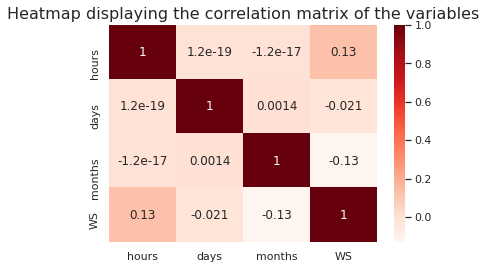

In [20]:
print('Correlation matrix\n',categorical_data.corr())
sns.set()
correlation_data = categorical_data[['hours', 'days', 'months', 'WS','PM10_deiktis','Synt Xrhs']]
sns.heatmap(correlation_data.corr(),cmap=plt.cm.Reds,annot=True)
plt.title('Heatmap displaying the correlation matrix of the variables',fontsize=16)
plt.show()
categorical_data=categorical_data.drop('PM10',axis=1)

# Splitting the dataset into the Training set and Test set

In [21]:
X= categorical_data.drop('PM10_deiktis',axis=1)                                #indepedent variable
#reset to characters
categorical_data.loc[(categorical_data['PM10_deiktis'] == 'low1'),'LOW1']= 1
categorical_data.loc[(categorical_data['PM10_deiktis'] == 'low2'),'LOW2']=2
categorical_data.loc[(categorical_data['PM10_deiktis'] == 'low3'),'LOW3']=3
categorical_data.loc[(categorical_data['PM10_deiktis'] == 'mod1'),'MOD1']=4
categorical_data.loc[(categorical_data['PM10_deiktis'] == 'mod2'),'MOD2']=5
categorical_data.loc[(categorical_data['PM10_deiktis'] == 'mod3'),'MOD3']=6
categorical_data.loc[(categorical_data['PM10_deiktis'] == 'high1'),'HIGH1']=7
categorical_data.loc[(categorical_data['PM10_deiktis'] == 'high2'),'HIGH2']=8
categorical_data.loc[(categorical_data['PM10_deiktis'] == 'high3'),'HIGH3']=9
categorical_data.loc[(categorical_data['PM10_deiktis'] == 'veryhigh'),'VERYHIGH']=10

categorical_data["PM10_deiktis"]= categorical_data[['LOW1','LOW2','LOW3','MOD1','MOD2','MOD3','HIGH1','HIGH2','HIGH3','VERYHIGH']].apply(lambda x: ''.join(x.dropna().astype(int).astype(str)),axis=1)
y=categorical_data['PM10_deiktis'] 

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1)

In [22]:
print(X,"\n\n",y)

        1    2    3    4    5    6    7    8  hours  days  months   WS  \
0     0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0    1.0   1.0     4.0  1.4   
1     0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0    2.0   1.0     4.0  1.2   
2     0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0    3.0   1.0     4.0  1.1   
3     0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0    4.0   1.0     4.0  0.5   
4     0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0    5.0   1.0     4.0  0.8   
...   ...  ...  ...  ...  ...  ...  ...  ...    ...   ...     ...  ...   
7747  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   20.0   2.0     9.0  1.9   
7748  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0   21.0   2.0     9.0  1.4   
7749  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0   22.0   2.0     9.0  1.2   
7750  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0   23.0   2.0     9.0  0.8   
7751  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0    0.0   2.0     9.0  0.4   

     Synt Xrhs  
0         43.5  
1         43.5  
2         43.5  
3         43.5  
4         43.5  
...      

# Feature Scaling

In [23]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()                                                           #standardisation
colNumber=8                                                                    
X_train.iloc[:, colNumber:] = sc.fit_transform(X_train.iloc[:, colNumber:].values)#Me tin fit_transform upologizw tin mesi timi kai tin tupiki apoklisi 
X_test.iloc[:, colNumber:] = sc.transform(X_test.iloc[:, colNumber:].values)


# Model Training

##As classification problem

In [24]:
from sklearn.metrics import r2_score,mean_squared_error
accuracyScores=[]
accuracyScores2=[]

#####SVM

In [25]:
print('\n----------- SVM ------------')
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train,y_train)
y_pred8 = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred8)
print('Score on train data: {}'.format(classifier.score(X_train,y_train)))
print('Score on test data: {}\n'.format(classifier.score(X_test,y_test)))
accuracy =accuracy_score(y_test,y_pred8)
print('Overall model accuracy: {}'.format(accuracy))
accuracyScores.append(accuracy)


----------- SVM ------------
Score on train data: 0.499312005503956
Score on test data: 0.49948400412796695

Overall model accuracy: 0.49948400412796695


#####SVM Kernel

In [26]:
print('\n----------- SVM Kernel ------------')
classifierKernel = SVC(kernel = 'rbf', random_state = 0)
classifierKernel.fit(X_train, y_train)
print('Score on train data: {}'.format(classifierKernel.score(X_train,y_train)))
print('Score on test data: {}\n'.format(classifierKernel.score(X_test,y_test)))
y_pred7 = classifierKernel.predict(X_test)
accuracy = accuracy_score(y_test,y_pred7)
print('Overall model accuracy: {}'.format(accuracy))
accuracyScores.append(accuracy)


----------- SVM Kernel ------------
Score on train data: 0.6609907120743034
Score on test data: 0.6346749226006192

Overall model accuracy: 0.6346749226006192


#####Gaussian Naive bayes

In [27]:
from sklearn.naive_bayes import GaussianNB
classifierNB = GaussianNB()
classifierNB.fit(X_train, y_train)
print('Score on train data: {}'.format(classifierNB.score(X_train,y_train)))
print('Score on test data: {}\n'.format(classifierNB.score(X_test,y_test)))
y_pred6 = classifierNB.predict(X_test)
accuracy = accuracy_score(y_test,y_pred6)
print('Overall model accuracy: {}'.format(accuracy))
accuracyScores.append(accuracy)

Score on train data: 0.06793945648434813
Score on test data: 0.058823529411764705

Overall model accuracy: 0.058823529411764705


#####K-NN

In [28]:
from sklearn.neighbors import KNeighborsClassifier
classifierKNN = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifierKNN.fit(X_train, y_train)
print('Score on train data: {}'.format(classifierKNN.score(X_train,y_train)))
print('Score on test data: {}\n'.format(classifierKNN.score(X_test,y_test)))
y_pred5 = classifierKNN.predict(X_test)
accuracy = accuracy_score(y_test,y_pred5)
print('Overall model accuracy: {}'.format(accuracy))
accuracyScores.append(accuracy)

Score on train data: 0.7707258341933264
Score on test data: 0.6604747162022704

Overall model accuracy: 0.6604747162022704


#####Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression
classifierLR = LogisticRegression(random_state = 0)
classifierLR.fit(X_train, y_train)
print('Score on train data: {}'.format(classifierLR.score(X_train,y_train)))
print('Score on test data: {}\n'.format(classifierLR.score(X_test,y_test)))
y_pred4 = classifierLR.predict(X_test)
accuracy = accuracy_score(y_test,y_pred4)
print('Overall model accuracy: {}'.format(accuracy))
accuracyScores.append(accuracy)

Score on train data: 0.5075679394564844
Score on test data: 0.5128998968008256

Overall model accuracy: 0.5128998968008256


#####Decision Tree

In [30]:
from sklearn.tree import DecisionTreeClassifier
classifierDT = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifierDT.fit(X_train, y_train)
print('Score on train data: {}'.format(classifierDT.score(X_train,y_train)))
print('Score on test data: {}\n'.format(classifierDT.score(X_test,y_test)))
y_pred3 = classifierDT.predict(X_test)
accuracy =accuracy_score(y_test,y_pred3)
print('Overall model accuracy: {}'.format(accuracy))
accuracyScores.append(accuracy)

Score on train data: 1.0
Score on test data: 0.7291021671826625

Overall model accuracy: 0.7291021671826625


#####Decision tree grid search

In [31]:
print('\n----------- Decision Tree Grid Search ------------')
from sklearn.model_selection import GridSearchCV,train_test_split
params = {'max_depth':[3,4,5,6,7],
         'max_features':['auto','sqrt','log2'],
         'min_samples_split':[2,3,4,5,6,7,8,9,10],
         'min_samples_leaf':[2,3,4,5,6,7,8,9,10]}
tree = DecisionTreeClassifier()
tree_search = GridSearchCV(tree,param_grid=params,n_jobs=-1,cv=5)
tree_search.fit(X_train,y_train)
print('Score on train data: {}'.format(tree_search.score(X_train,y_train)))
print('Score on test data: {}'.format(tree_search.score(X_test,y_test)))
print('Best parameters found:')
display(tree_search.best_params_)
tree_search_pred = tree_search.predict(X_test)
tree_search_accuracy = accuracy_score(y_test,tree_search_pred)
print('Overall model accuracy: {}'.format(tree_search_accuracy))


----------- Decision Tree Grid Search ------------
Score on train data: 0.5975232198142415
Score on test data: 0.5732714138286894
Best parameters found:


{'max_depth': 7,
 'max_features': 'sqrt',
 'min_samples_leaf': 9,
 'min_samples_split': 7}

Overall model accuracy: 0.5732714138286894


#####Random Forest

In [32]:
from sklearn.ensemble import RandomForestClassifier
classifierRF = RandomForestClassifier(n_estimators = 1000, criterion = 'entropy', random_state = 0)
classifierRF.fit(X_train, y_train)
print('Score on train data: {}'.format(classifierRF.score(X_train,y_train)))
print('Score on test data: {}\n'.format(classifierRF.score(X_test,y_test)))
y_pred2 = classifierRF.predict(X_test)
accuracy = accuracy_score(y_test,y_pred2)
print('Overall model accuracy: {}'.format(accuracy))
accuracyScores.append(accuracy)

Score on train data: 1.0
Score on test data: 0.7512899896800825

Overall model accuracy: 0.7512899896800825


#####MLP

In [33]:
from sklearn.neural_network import MLPClassifier
clfMLP = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
clfMLP.fit(X_train, y_train)
print('Score on train data: {}'.format(clfMLP.score(X_train,y_train)))
print('Score on test data: {}\n'.format(clfMLP.score(X_test,y_test)))
y_pred2 = clfMLP.predict(X_test)
accuracy = accuracy_score(y_test,y_pred2)
print('Overall model accuracy: {}'.format(accuracy))
accuracyScores.append(accuracy)
print('Parameters currently in use:\n')
print(clfMLP.get_params())

Score on train data: 0.6200550395596836
Score on test data: 0.6222910216718266

Overall model accuracy: 0.6222910216718266
Parameters currently in use:

{'activation': 'relu', 'alpha': 1e-05, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (5, 2), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 1, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


#####Gradient Boosting Classifier

In [34]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1,
                                 max_depth=1, random_state=0).fit(X_train, y_train)
clf.fit(X_train, y_train)
print('Score on train data: {}'.format(clf.score(X_train,y_train)))
print('Score on test data: {}\n'.format(clf.score(X_test,y_test)))
y_pred1 = clf.predict(X_test)
accuracy = accuracy_score(y_test,y_pred1)
print('Overall model accuracy: {}'.format(accuracy))
accuracyScores.append(accuracy)

Score on train data: 0.6193670450636395
Score on test data: 0.586687306501548

Overall model accuracy: 0.586687306501548


#####Randomized Search CV

In [35]:
from sklearn.model_selection import RandomizedSearchCV
params['learning_rate'] = np.linspace(0.1,0.2,10)#start,stop, num
clf1 = GradientBoostingClassifier()
clf = RandomizedSearchCV(clf1,params,n_jobs=-1,cv=5,verbose=2)
clf.fit(X_train, y_train)
print('Score on train data: {}'.format(clf.score(X_train,y_train)))
print('Score on test data: {}\n'.format(clf.score(X_test,y_test)))
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print('Overall model accuracy: {}'.format(accuracy))
accuracyScores.append(accuracy)
accuracyScores2.append(accuracy)
print(clf.get_params())
print('Best parameters found:')
display(clf.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  4.6min finished


Score on train data: 0.9688682490540076
Score on test data: 0.7523219814241486

Overall model accuracy: 0.7523219814241486
{'cv': 5, 'error_score': nan, 'estimator__ccp_alpha': 0.0, 'estimator__criterion': 'friedman_mse', 'estimator__init': None, 'estimator__learning_rate': 0.1, 'estimator__loss': 'deviance', 'estimator__max_depth': 3, 'estimator__max_features': None, 'estimator__max_leaf_nodes': None, 'estimator__min_impurity_decrease': 0.0, 'estimator__min_impurity_split': None, 'estimator__min_samples_leaf': 1, 'estimator__min_samples_split': 2, 'estimator__min_weight_fraction_leaf': 0.0, 'estimator__n_estimators': 100, 'estimator__n_iter_no_change': None, 'estimator__presort': 'deprecated', 'estimator__random_state': None, 'estimator__subsample': 1.0, 'estimator__tol': 0.0001, 'estimator__validation_fraction': 0.1, 'estimator__verbose': 0, 'estimator__warm_start': False, 'estimator': GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                    

{'learning_rate': 0.1,
 'max_depth': 7,
 'max_features': 'auto',
 'min_samples_leaf': 8,
 'min_samples_split': 4}

###K-FOLD CROSS VALIDATION (K=10)

In [36]:
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler

#####SVM

In [37]:
print('\n----------- SVM ------------')
scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(X)

scores = []
best_model= SVC(kernel = 'linear', random_state = 0)
cv = KFold(10, True,1)
for train_index, test_index in cv.split(X):

    X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
    best_model.fit(X_train, y_train)
    print('Score on test data: {}\n'.format(best_model.score(X_test,y_test)))
    scores.append(best_model.score(X_test, y_test))
print("MESOS OROS ACCURACY: ", np.mean(scores)) 
accuracyScores2.append(np.mean(scores))


----------- SVM ------------
Score on test data: 0.5167525773195877

Score on test data: 0.48582474226804123

Score on test data: 0.5135483870967742

Score on test data: 0.4890322580645161

Score on test data: 0.47483870967741937

Score on test data: 0.48

Score on test data: 0.5019354838709678

Score on test data: 0.5096774193548387

Score on test data: 0.4864516129032258

Score on test data: 0.5187096774193548

MESOS OROS ACCURACY:  0.4976770867974725


####SVM rbf

In [38]:
scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(X)

scores = []
best_model= SVC(kernel = 'rbf', random_state = 0)
cv = KFold(10, True,1)
for train_index, test_index in cv.split(X):
    #print("Train Index: ", train_index, "\n")
    #print("Test Index: ", test_index)
    X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
    best_model.fit(X_train, y_train)
    y_pred77 = best_model.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred77)
    print('Overall model accuracy: {}'.format(accuracy))
    print('Score on test data: {}\n'.format(best_model.score(X_test,y_test)))
    scores.append(best_model.score(X_test, y_test))
print("MESOS OROS ACCURACY: ", np.mean(scores)) 
accuracyScores2.append(np.mean(scores))

Overall model accuracy: 0.5889175257731959
Score on test data: 0.5889175257731959

Overall model accuracy: 0.5850515463917526
Score on test data: 0.5850515463917526

Overall model accuracy: 0.5780645161290323
Score on test data: 0.5780645161290323

Overall model accuracy: 0.6051612903225806
Score on test data: 0.6051612903225806

Overall model accuracy: 0.5819354838709677
Score on test data: 0.5819354838709677

Overall model accuracy: 0.5987096774193549
Score on test data: 0.5987096774193549

Overall model accuracy: 0.5948387096774194
Score on test data: 0.5948387096774194

Overall model accuracy: 0.5729032258064516
Score on test data: 0.5729032258064516

Overall model accuracy: 0.5948387096774194
Score on test data: 0.5948387096774194

Overall model accuracy: 0.6051612903225806
Score on test data: 0.6051612903225806

MESOS OROS ACCURACY:  0.5905581975390756


####Gaussian naive bayes

In [39]:
print('\n----------- Gaussian naive bayes ------------')
scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(X)
scores = []
best_model= GaussianNB()
cv = KFold(10, True,1)
for train_index, test_index in cv.split(X):
    #print("Train Index: ", train_index, "\n")
    #print("Test Index: ", test_index)
    X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
    best_model.fit(X_train, y_train)
    print('Score on test data: {}\n'.format(best_model.score(X_test,y_test)))
    scores.append(best_model.score(X_test, y_test))
print("MESOS OROS ACCURACY: ", np.mean(scores))
accuracyScores2.append(np.mean(scores))


----------- Gaussian naive bayes ------------
Score on test data: 0.061855670103092786

Score on test data: 0.05283505154639175

Score on test data: 0.05806451612903226

Score on test data: 0.12645161290322582

Score on test data: 0.03741935483870968

Score on test data: 0.06322580645161291

Score on test data: 0.0567741935483871

Score on test data: 0.07225806451612904

Score on test data: 0.06580645161290323

Score on test data: 0.05290322580645161

MESOS OROS ACCURACY:  0.06475939474559361


####Logistic Regression

In [40]:
scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(X)
scores = []
best_model= LogisticRegression(random_state = 0)
cv = KFold(10, True,1)
for train_index, test_index in cv.split(X):
    #print("Train Index: ", train_index, "\n")
    #print("Test Index: ", test_index)
    X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
    best_model.fit(X_train, y_train)
    print('Score on test data: {}\n'.format(best_model.score(X_test,y_test)))
    scores.append(best_model.score(X_test, y_test))
print("MESOS OROS ACCURACY: ", np.mean(scores))
accuracyScores2.append(np.mean(scores))

Score on test data: 0.5219072164948454

Score on test data: 0.5025773195876289

Score on test data: 0.5251612903225806

Score on test data: 0.5109677419354839

Score on test data: 0.48258064516129034

Score on test data: 0.5083870967741936

Score on test data: 0.4941935483870968

Score on test data: 0.5096774193548387

Score on test data: 0.5045161290322581

Score on test data: 0.5135483870967742

MESOS OROS ACCURACY:  0.507351679414699


####MLP

In [41]:
scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(X)
scores = []
best_model2= MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
cv = KFold(10, True,1)
for train_index, test_index in cv.split(X):
    #print("Train Index: ", train_index, "\n")
    #print("Test Index: ", test_index)
    X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
    best_model2.fit(X_train, y_train)
    print('Score on test data: {}\n'.format(best_model2.score(X_test,y_test)))
    scores.append(best_model2.score(X_test, y_test))
print("MESOS OROS ACCURACY: ", np.mean(scores))
accuracyScores2.append(np.mean(scores))

Score on test data: 0.5644329896907216

Score on test data: 0.5876288659793815

Score on test data: 0.5974193548387097

Score on test data: 0.5819354838709677

Score on test data: 0.5716129032258065

Score on test data: 0.5664516129032258

Score on test data: 0.584516129032258

Score on test data: 0.607741935483871

Score on test data: 0.6296774193548387

Score on test data: 0.6206451612903225

MESOS OROS ACCURACY:  0.5912061855670103


####K-NN

In [42]:
print('\n----------- KNN ------------')
scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(X)

scores = []
best_model= KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
cv = KFold(10, True,1)
for train_index, test_index in cv.split(X):
    #print("Train Index: ", train_index, "\n")
    #print("Test Index: ", test_index)
    X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
    best_model.fit(X_train, y_train)
    print('Score on test data: {}\n'.format(best_model.score(X_test,y_test)))
    scores.append(best_model.score(X_test, y_test))
print("MESOS OROS ACCURACY: ", np.mean(scores)) 
accuracyScores2.append(np.mean(scores))


----------- KNN ------------
Score on test data: 0.7332474226804123

Score on test data: 0.6752577319587629

Score on test data: 0.6516129032258065

Score on test data: 0.6490322580645161

Score on test data: 0.6683870967741935

Score on test data: 0.6541935483870968

Score on test data: 0.6761290322580645

Score on test data: 0.6890322580645162

Score on test data: 0.6709677419354839

Score on test data: 0.6787096774193548

MESOS OROS ACCURACY:  0.6746569670768208


####Decision tree

In [43]:
print('\n----------- Decision trees ------------')
scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(X)

scores = []
#best_model= RandomForestClassifier(n_estimators = 15, criterion = 'entropy', random_state = 0)
best_model = DecisionTreeClassifier( criterion = 'entropy', random_state = 0)
cv = KFold(10, True,1)
for train_index, test_index in cv.split(X):
    #print("Train Index: ", train_index, "\n")
    #print("Test Index: ", test_index)
    X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
    best_model.fit(X_train, y_train)
    print('Score on test data: {}\n'.format(best_model.score(X_test,y_test)))
    scores.append(best_model.score(X_test, y_test))
print("MESOS OROS ACCURACY: ", np.mean(scores))  
accuracyScores2.append(np.mean(scores))


----------- Decision trees ------------
Score on test data: 0.7525773195876289

Score on test data: 0.7216494845360825

Score on test data: 0.7161290322580646

Score on test data: 0.7419354838709677

Score on test data: 0.7070967741935484

Score on test data: 0.7251612903225807

Score on test data: 0.7406451612903225

Score on test data: 0.7380645161290322

Score on test data: 0.7664516129032258

Score on test data: 0.7419354838709677

MESOS OROS ACCURACY:  0.7351646158962422


####Random Forest

In [44]:
print('\n----------- Random forests ------------')
scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(X)

scores = []
best_model1= RandomForestClassifier(n_estimators = 15, criterion = 'entropy', random_state = 0)

cv = KFold(10, True,1)
for train_index, test_index in cv.split(X):
    #print("Train Index: ", train_index, "\n")
    #print("Test Index: ", test_index)
    X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
    best_model1.fit(X_train, y_train)
    print('Score on test data: {}\n'.format(best_model1.score(X_test,y_test)))
    scores.append(best_model1.score(X_test, y_test))
print("MESOS OROS ACCURACY: ", np.mean(scores)) 
accuracyScores2.append(np.mean(scores))


----------- Random forests ------------
Score on test data: 0.7615979381443299

Score on test data: 0.720360824742268

Score on test data: 0.7303225806451613

Score on test data: 0.7561290322580645

Score on test data: 0.7238709677419355

Score on test data: 0.7341935483870968

Score on test data: 0.7419354838709677

Score on test data: 0.7587096774193548

Score on test data: 0.7741935483870968

Score on test data: 0.7354838709677419

MESOS OROS ACCURACY:  0.7436797472564016


####Gradient boosting cliassifier

In [45]:
print('\n----------- Gradient boosting classifier ------------')
scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(X)

scores = []
best_model= GradientBoostingClassifier(n_estimators=100, learning_rate=1,
                                 max_depth=1, random_state=0).fit(X_train, y_train)

cv = KFold(10, True,1)
for train_index, test_index in cv.split(X):
    #print("Train Index: ", train_index, "\n")
    #print("Test Index: ", test_index)
    X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
    best_model.fit(X_train, y_train)
    print('Score on test data: {}\n'.format(best_model.score(X_test,y_test)))
    scores.append(best_model.score(X_test, y_test))
print("MESOS OROS ACCURACY: ", np.mean(scores)) 
accuracyScores2.append(np.mean(scores))


----------- Gradient boosting classifier ------------
Score on test data: 0.615979381443299

Score on test data: 0.5760309278350515

Score on test data: 0.5987096774193549

Score on test data: 0.6051612903225806

Score on test data: 0.5870967741935483

Score on test data: 0.5832258064516129

Score on test data: 0.5509677419354839

Score on test data: 0.6258064516129033

Score on test data: 0.5638709677419355

Score on test data: 0.6258064516129033

MESOS OROS ACCURACY:  0.5932655470568673


####Bagging classifier

In [46]:
print('\n----------- Bagging Classifier ------------')
from sklearn.model_selection import RepeatedStratifiedKFold 
from sklearn.ensemble import BaggingClassifier
n_estimators = [10, 100, 1000]
model = BaggingClassifier()     #by deafult estimator einai to decisiontreeclassifier
# define grid search
grid = dict(n_estimators=n_estimators)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param)) 
accuracyScores.append(grid_result.best_score_)    
accuracyScores2.append(grid_result.best_score_) 


----------- Bagging Classifier ------------
Best: 0.784814 using {'n_estimators': 1000}
0.759875 (0.014570) with: {'n_estimators': 10}
0.781708 (0.012353) with: {'n_estimators': 100}
0.784814 (0.013710) with: {'n_estimators': 1000}


In [47]:
#kanw tis times twn score se pososto 
new_accuracyScores = [round(i*100) for i in accuracyScores]
new_accuracyScores2 = [round(i*100) for i in accuracyScores2]

#Scores and Visualising the results


 ------------- Score of Models -----------------
SVM Score: 50 %
SVM Kernel Score: 63 %
Naive Bayes Score: 6 %
K-NN Score: 66 %
Logistic Regression Score: 51 %
Decision Tree Score: 73 %
Random Forest Score: 75 %
MLP Score: 62 %
Gradient Boosting Classifier Score: 59 %
RandomizedSearchCV Score: 75 %
Bagging Classifier Score: 78 %


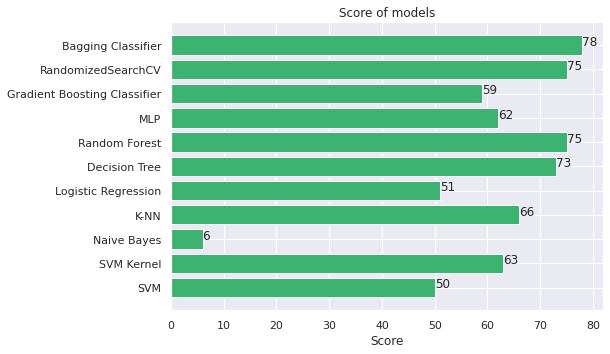

In [48]:
print("\n ------------- Score of Models -----------------")

modelList=['SVM','SVM Kernel','Naive Bayes','K-NN','Logistic Regression','Decision Tree',
           'Random Forest','MLP','Gradient Boosting Classifier','RandomizedSearchCV',
           'Bagging Classifier']

for i,j in zip(modelList, new_accuracyScores):
    print(i,'Score:',j,"%")
#plot the score of models        
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.barh(modelList,new_accuracyScores,color=['mediumseagreen'])
plt.title('Score of models')
plt.xlabel('Score')
for modelList, value in enumerate(new_accuracyScores):
    plt.text(value, modelList, str(value))
plt.show()


 ------------- Score of Models with K -----------------
Randomized search Score: 75 %
SVM  Score: 50 %
SVM rbf Score: 59 %
Naive Bayes Score: 6 %
Logistic Regression Score: 51 %
MLP Score: 59 %
K-NN Score: 67 %
Decision Tree Score: 74 %
Random Forest Score: 74 %
Gradient Boosting Classifier Score: 59 %
Bagging Classifier Score: 78 %


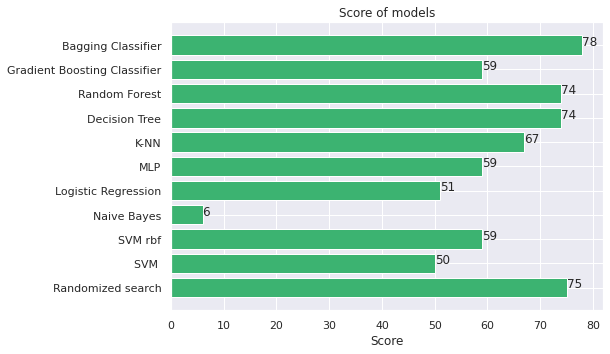

In [49]:
print("\n ------------- Score of Models with K -----------------")
modelList2=['Randomized search','SVM ','SVM rbf','Naive Bayes','Logistic Regression','MLP','K-NN','Decision Tree',
           'Random Forest','Gradient Boosting Classifier','Bagging Classifier']

for i,j in zip(modelList2, new_accuracyScores2):
    print(i,'Score:',j,"%")
#plot the score of models        
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.barh(modelList2,new_accuracyScores2,color=['mediumseagreen'])
plt.title('Score of models')
plt.xlabel('Score')
for modelList2, value in enumerate(new_accuracyScores2):
    plt.text(value, modelList2, str(value))
plt.show()

Visualising the best model (Bagging classifier)

In [50]:
#xrisimopoiw to kalutero modelo gia na kanw predict ton deikti pm10
compare_data = pd.DataFrame({'dates':df['datetime'],
                            'Actual PM10':y,
                            'Predicted PM10':grid_search.predict(X)})
compare_data["Actual PM10"] = pd.to_numeric(compare_data["Actual PM10"])
compare_data["Predicted PM10"] = pd.to_numeric(compare_data["Predicted PM10"])
compare_data.set_index('dates',inplace=True)
compare_data['Predicted PM10'] = np.round(compare_data['Predicted PM10'],1)

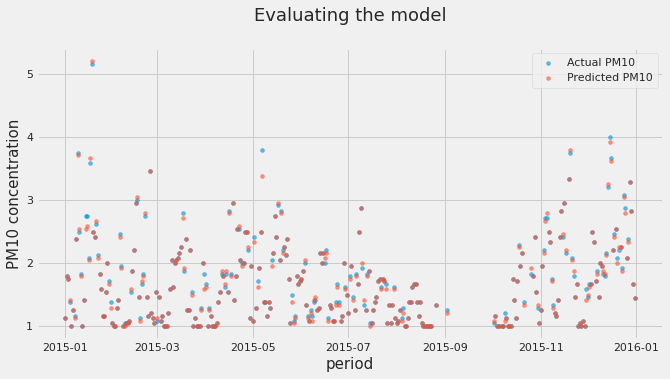

In [51]:
# plot the daily averages of the Actual PM10 and the predicted PM10
compare_data = compare_data.resample('D').mean()

with plt.style.context('fivethirtyeight'):
    plt.figure(figsize=(10,5))
    plt.scatter(compare_data.index,compare_data['Actual PM10'],s=15,label='Actual PM10',
               alpha=.6)
    plt.scatter(compare_data.index,compare_data['Predicted PM10'],s=15,label='Predicted PM10',
               alpha=.6)
    plt.legend()
    plt.title('Evaluating the model\n',
             fontsize=18)
    plt.xlabel('period',fontsize=15)
    plt.ylabel('PM10 concentration',fontsize=15)
    plt.show() 

Parity plot


Text(0, 0.5, 'Predicted')

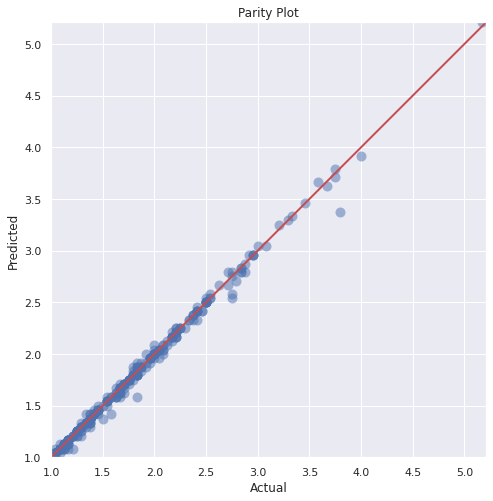

In [53]:
fignow = plt.figure(figsize=(8,8))

x = compare_data['Actual PM10']
y = compare_data["Predicted PM10"]

## find the boundaries of X and Y values
bounds = (min(x.min(), y.min()) - int(0.1 * y.min()), max(x.max(), y.max())+ int(0.1 * y.max()))

# Reset the limits
ax = plt.gca()
ax.set_xlim(bounds)
ax.set_ylim(bounds)
# Ensure the aspect ratio is square
ax.set_aspect("equal", adjustable="box")

plt.plot(x,y,"o", alpha=0.5 ,ms=10, markeredgewidth=0.0)

ax.plot([0, 1], [0, 1], "r-",lw=2 ,transform=ax.transAxes)

# Calculate Statistics of the Parity Plot 
mean_abs_err = np.mean(np.abs(x-y))
rmse = np.sqrt(np.mean((x-y)**2))
rmse_std = rmse / np.std(y)

# Title and labels 
plt.title("Parity Plot")
plt.xlabel('Actual')
plt.ylabel('Predicted')